我想看看相关系数，比如读取上证指数(sh.000001),我这里只是取得sh开头的图片的信息。

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 
import os
# from tqdm.notebook import  tqdm
from tqdm import  tqdm
import talib


In [2]:
import sys
sys.path.append('../../DataSource/baostock')
import datasource

In [3]:
codes = datasource.get_codes()
print(f'共有{len(codes)}支股票')

共有5450支股票


In [4]:
# 先取得上证的信息
sh000001 = datasource.get_data('sh.000001')
sh000001_close = sh000001.loc[:,['close']]

In [5]:
sh000001_close.head()

,close
date,
2010-01-04,3243.760
2010-01-05,3282.179
2010-01-06,3254.215
2010-01-07,3192.776
2010-01-08,3195.997


In [6]:
# 这里首先筛选所有的上海交易所的股票
sh_codes = [i for i in codes if i.startswith('sh')]

In [7]:
_data =  datasource.get_data(sh_codes[0])
_data_close = _data.loc[:,['close']]
_data_close.rename(columns={'close': 'close2'}, inplace=True)
_data_close.head()


,close2
date,
2010-01-04,5.079667
2010-01-05,5.118022
2010-01-06,5.017340
2010-01-07,4.904671
2010-01-08,4.959807


In [8]:
_df = pd.merge(sh000001_close, _data_close, on='date')
_df.head()

,close,close2
date,,
2010-01-04,3243.760,5.079667
2010-01-05,3282.179,5.118022
2010-01-06,3254.215,5.017340
2010-01-07,3192.776,4.904671
2010-01-08,3195.997,4.959807


In [19]:
# 然后遍历所有的股票
lst_corr = []

for i in tqdm(range(len(sh_codes))):
    _code = sh_codes[i]
    _data =  datasource.get_data(_code)
    _data_close = _data.loc[:,['close']]
    # print(sh000001_close.head())
    # print(_data_close.head())
    # 然后两个做交集
    _df = pd.merge(sh000001_close, _data_close, on='date')
    # print(_df.head())
    correlation = _df.corr()
    # print(correlation)
    item = correlation.iloc[0,1]
    if not pd.isnull(item):
        lst_corr.append((_code, float(item)))

    
    

100%|██████████████████████████████████████████████████████████████████████████████| 2412/2412 [00:34<00:00, 70.69it/s]


In [20]:
lst_corr[:10]

[('sh.600000', 0.7012388579333659),
 ('sh.600004', 0.6034835479748356),
 ('sh.600005', 0.7879983037122542),
 ('sh.600006', 0.8321804382438145),
 ('sh.600007', 0.5349330175308631),
 ('sh.600008', 0.6685040289287266),
 ('sh.600009', 0.49210990817274575),
 ('sh.600010', 0.5395772942400185),
 ('sh.600011', 0.580077225497635),
 ('sh.600012', 0.5262097839938951)]

In [21]:
# 这里排序
lst_corr.sort(key=lambda x:x[1])

In [22]:
lst_corr[:10]

[('sh.603257', -0.7049029564241533),
 ('sh.603210', -0.6699022124994609),
 ('sh.605116', -0.6479902972009737),
 ('sh.688717', -0.5474482524939795),
 ('sh.603202', -0.5467932161560849),
 ('sh.603706', -0.488984428532836),
 ('sh.688676', -0.48209892999462417),
 ('sh.603863', -0.47751672462980044),
 ('sh.601702', -0.4738145885333536),
 ('sh.688639', -0.47066217494935597)]

In [23]:
# 只是要相关系数
lst_corr3 = [i[1] for i in lst_corr]

In [26]:
lst_corr[-10:]

[('sh.688660', 0.8338615301147488),
 ('sh.688249', 0.8351719607007992),
 ('sh.600704', 0.8369743793292267),
 ('sh.688709', 0.838837935960812),
 ('sh.601688', 0.8412144887960881),
 ('sh.688692', 0.8419412593845861),
 ('sh.600253', 0.8429055107171408),
 ('sh.601377', 0.8523055377695803),
 ('sh.600999', 0.86666801264346),
 ('sh.600087', 0.937821235301787)]

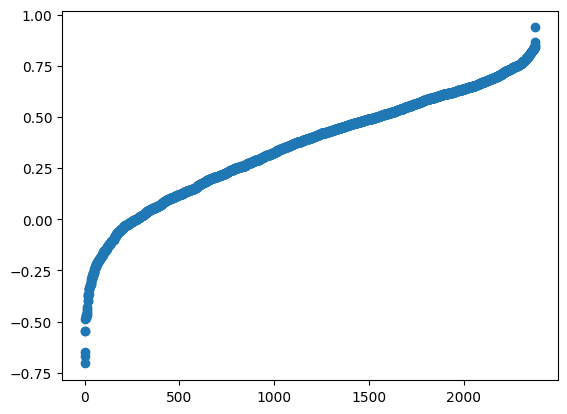

In [25]:
plt.scatter(list(range(len(lst_corr3))), lst_corr3)
# function to show the plot 
plt.show()